<a href="https://colab.research.google.com/github/wpowell31/Pipelines/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

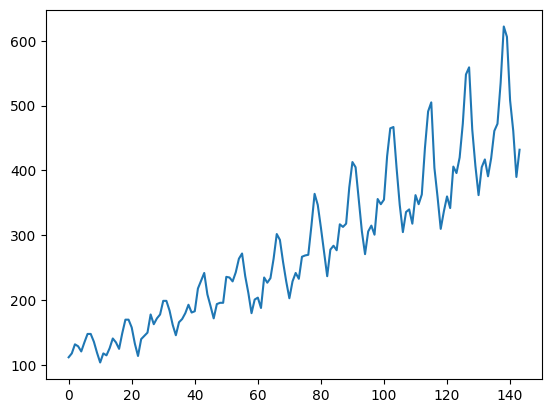

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('airline.csv')
timeseries = df[["Passengers"]].values.astype('float32')

plt.plot(timeseries)
plt.show()

In [3]:
# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

In [4]:
import torch

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [5]:
lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([95, 1, 1]) torch.Size([95, 1, 1])
torch.Size([47, 1, 1]) torch.Size([47, 1, 1])


<ipython-input-4-a735f5d33891>:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.tensor(X), torch.tensor(y)


In [8]:
import torch.nn as nn

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x



In [9]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 226.2273, test RMSE 422.6601
Epoch 100: train RMSE 185.1259, test RMSE 379.6228
Epoch 200: train RMSE 151.7927, test RMSE 343.6510
Epoch 300: train RMSE 123.1700, test RMSE 311.0552
Epoch 400: train RMSE 99.8472, test RMSE 281.6198
Epoch 500: train RMSE 81.2849, test RMSE 255.1024
Epoch 600: train RMSE 64.9893, test RMSE 229.6884
Epoch 700: train RMSE 52.4377, test RMSE 206.5784
Epoch 800: train RMSE 43.1017, test RMSE 185.8806
Epoch 900: train RMSE 36.0980, test RMSE 167.7098
Epoch 1000: train RMSE 32.5045, test RMSE 152.1133
Epoch 1100: train RMSE 30.1257, test RMSE 139.2372
Epoch 1200: train RMSE 26.5536, test RMSE 129.3790
Epoch 1300: train RMSE 25.6186, test RMSE 121.7611
Epoch 1400: train RMSE 25.1011, test RMSE 115.0260
Epoch 1500: train RMSE 24.2150, test RMSE 110.3795
Epoch 1600: train RMSE 23.8854, test RMSE 107.0622
Epoch 1700: train RMSE 23.8361, test RMSE 103.7834
Epoch 1800: train RMSE 23.6128, test RMSE 101.9013
Epoch 1900: train RMSE 23.9056, test RM

Epoch 0: train RMSE 225.6387, test RMSE 424.8967
Epoch 100: train RMSE 178.7267, test RMSE 375.6714
Epoch 200: train RMSE 142.7272, test RMSE 336.3661
Epoch 300: train RMSE 113.1062, test RMSE 301.4082
Epoch 400: train RMSE 90.4819, test RMSE 270.3988
Epoch 500: train RMSE 67.1689, test RMSE 234.7614
Epoch 600: train RMSE 52.3942, test RMSE 206.5158
Epoch 700: train RMSE 41.7223, test RMSE 181.4009
Epoch 800: train RMSE 34.7090, test RMSE 160.1833
Epoch 900: train RMSE 29.9600, test RMSE 142.2094
Epoch 1000: train RMSE 26.6205, test RMSE 127.1571
Epoch 1100: train RMSE 24.6226, test RMSE 115.2843
Epoch 1200: train RMSE 23.0811, test RMSE 105.4344
Epoch 1300: train RMSE 22.5994, test RMSE 97.7004
Epoch 1400: train RMSE 21.4470, test RMSE 92.1764
Epoch 1500: train RMSE 20.9105, test RMSE 87.2891
Epoch 1600: train RMSE 20.2228, test RMSE 83.2264
Epoch 1700: train RMSE 20.0268, test RMSE 80.9335
Epoch 1800: train RMSE 19.8148, test RMSE 77.8674
Epoch 1900: train RMSE 19.2701, test RMSE 76.

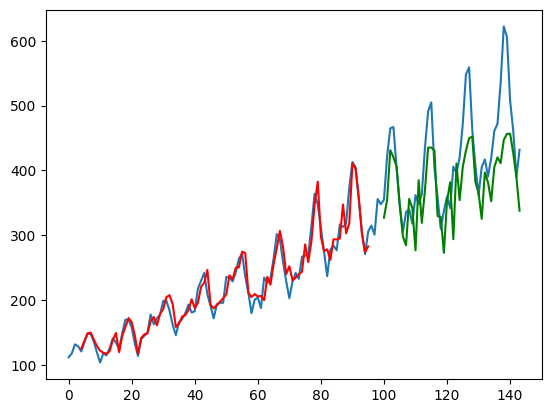

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

df = pd.read_csv('airline.csv')
timeseries = df[["Passengers"]].values.astype('float32')

# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

lookback = 4
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()